# Week 2: Lasso, Ridge, and Elastic Net Regression

In this notebook, we apply regularization techniques to the cybersecurity dataset in order to handle multicollinearity and prevent overfitting.

In [ ]:
# Week 2: Regularization Techniques - Lasso, Ridge, and Elastic Net Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('cybersecurity_attacks.csv')
df.head()


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [7]:
# Drop rows with missing Packet Length 
df = df.copy()
df = df.dropna(subset=['Packet Length'])

# Convert categorical 'Protocol' and 'Traffic Type' into dummy variables
df = pd.get_dummies(df, columns=['Protocol', 'Traffic Type'], drop_first=True)


X = df[['Source Port', 'Destination Port'] + 
       [col for col in df.columns if col.startswith('Protocol_') or col.startswith('Traffic Type_')]]

y = df['Packet Length'].astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
ridge = Ridge()
params_ridge = {'alpha': np.logspace(-4, 4, 50)}
ridge_cv = GridSearchCV(ridge, params_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

y_pred_ridge = ridge_cv.predict(X_test)

print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R^2:", r2_score(y_test, y_pred_ridge))

Best Ridge alpha: 10000.0
Ridge MSE: 171323.27197074168
Ridge R^2: -0.0012430995252536992


In [9]:
lasso = Lasso(max_iter=10000)
params_lasso = {'alpha': np.logspace(-4, 1, 50)}
lasso_cv = GridSearchCV(lasso, params_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

y_pred_lasso = lasso_cv.predict(X_test)

print("Best Lasso alpha:", lasso_cv.best_params_['alpha'])
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R^2:", r2_score(y_test, y_pred_lasso))

Best Lasso alpha: 2.44205309454865
Lasso MSE: 171273.99540336258
Lasso R^2: -0.0009551186660914368


In [10]:
elastic = ElasticNet(max_iter=10000)
params_elastic = {
    'alpha': np.logspace(-4, 1, 10),
    'l1_ratio': np.linspace(0.1, 1.0, 10)
}
elastic_cv = GridSearchCV(elastic, params_elastic, cv=5, scoring='neg_mean_squared_error')
elastic_cv.fit(X_train, y_train)

y_pred_elastic = elastic_cv.predict(X_test)

print("Best ElasticNet alpha:", elastic_cv.best_params_['alpha'])
print("Best ElasticNet l1_ratio:", elastic_cv.best_params_['l1_ratio'])
print("ElasticNet MSE:", mean_squared_error(y_test, y_pred_elastic))
print("ElasticNet R^2:", r2_score(y_test, y_pred_elastic))

Best ElasticNet alpha: 2.782559402207126
Best ElasticNet l1_ratio: 1.0
ElasticNet MSE: 171269.54709314983
ElasticNet R^2: -0.0009291219649205651


         Model    Best Alpha       Test MSE  R^2 Score
0        Ridge  10000.000000  171323.271971  -0.001243
1        Lasso      2.442053  171273.995403  -0.000955
2  Elastic Net      2.782559  171269.547093  -0.000929


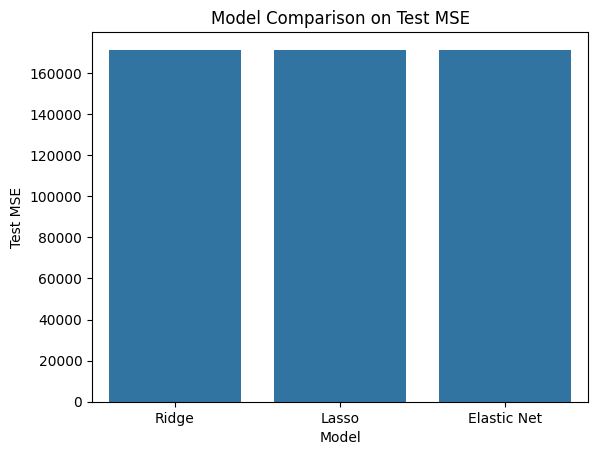

In [11]:
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Elastic Net'],
    'Best Alpha': [
        ridge_cv.best_params_['alpha'],
        lasso_cv.best_params_['alpha'],
        elastic_cv.best_params_['alpha']
    ],
    'Test MSE': [
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_elastic)
    ],
    'R^2 Score': [
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_elastic)
    ]
})
print(results)

# Plot
sns.barplot(x='Model', y='Test MSE', data=results)
plt.title("Model Comparison on Test MSE")
plt.show()